In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0,)
y_data=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0)
y_data=y_data[y_data>0]#no erroors

In [0]:
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,9:18]

In [0]:
y_data=result["value"]/3.6 #Km/h to m/s

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
y_pred=RandomForestRegressor().fit(x_train,y_train).predict(x_test)

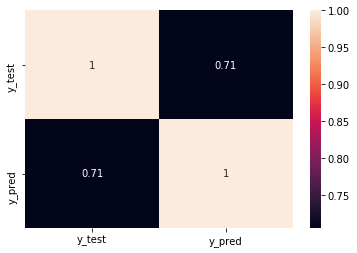

In [9]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sns.heatmap(df2.corr(),annot=True)


<Figure size 720x576 with 0 Axes>

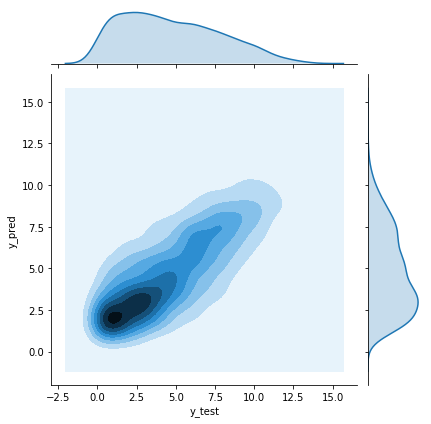

In [11]:
plt.figure(figsize=(10, 8))
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2)

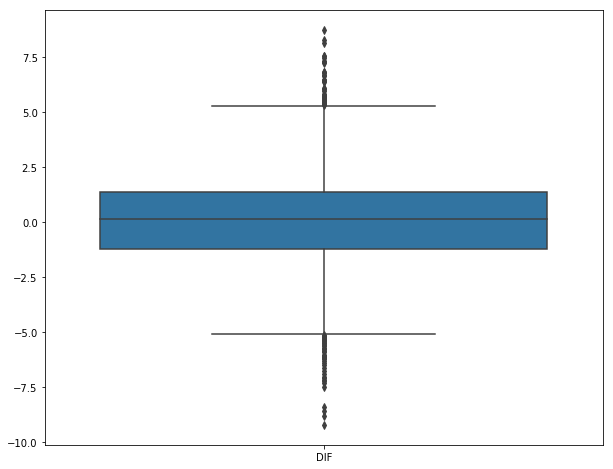

In [15]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])